In [1]:
#imporando as bibliotecas
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
#definir os caminhos dos diretórios 
#definir train_dir test_dir valid_dir

train_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\train'
test_dir = 'C:\\Users\\rafin\OneDrive\\Área de Trabalho\\trabalho de deep\\test'
valid_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\valid'

In [3]:
# tamanho da imagem
img_width, img_height = 190, 190

In [4]:
# Definir tamanho do lote
batch_size = 64

In [5]:
# Gerar dados de treinamento e dividir por 255 fazer imagem no intervalo -1,1

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input,validation_split=0.2)

In [9]:
#dados de treino
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 16171 images belonging to 414 classes.


In [10]:
# Gerar dados de validação
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 3985 images belonging to 414 classes.


In [11]:
# Gerar dados de teste
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 20156 images belonging to 414 classes.


In [13]:
# Construir a rede neural conv2d e densa
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding="same", input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 190, 190, 256)     7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 512)       1180160   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 512)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 128)       589952    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Treino
history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
253/253 [==============================] - 1881s 7s/step - loss: 4.7580 - accuracy: 0.0600 - val_loss: 4.0309 - val_accuracy: 0.1709
Epoch 2/30
253/253 [==============================] - 1807s 7s/step - loss: 3.7229 - accuracy: 0.2193 - val_loss: 3.1604 - val_accuracy: 0.3528
Epoch 3/30
253/253 [==============================] - 1797s 7s/step - loss: 3.0658 - accuracy: 0.3382 - val_loss: 2.6951 - val_accuracy: 0.4284
Epoch 4/30
253/253 [==============================] - 1783s 7s/step - loss: 2.5922 - accuracy: 0.4158 - val_loss: 2.4303 - val_accuracy: 0.4770
Epoch 5/30
253/253 [==============================] - 1800s 7s/step - loss: 2.2732 - accuracy: 0.4669 - val_loss: 2.2230 - val_accuracy: 0.5084
Epoch 6/30
253/253 [==============================] - 1792s 7s/step - loss: 1.9955 - accuracy: 0.5160 - val_loss: 2.1056 - val_accuracy: 0.5418
Epoch 7/30
253/253 [==============================] - 1791s 7s/step - loss: 1.8036 - accuracy: 0.5452 - val_loss: 2.0100 - val_accuracy:

In [16]:
#acuracia
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


315/315 [==============================] - 686s 2s/step - loss: 257.8606 - accuracy: 0.4709
Test accuracy: 0.47087717056274414


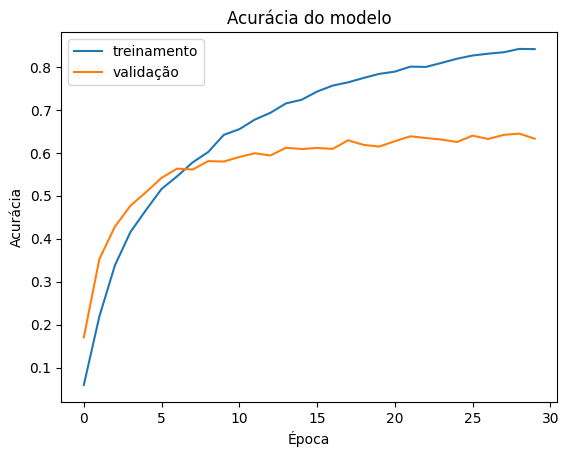

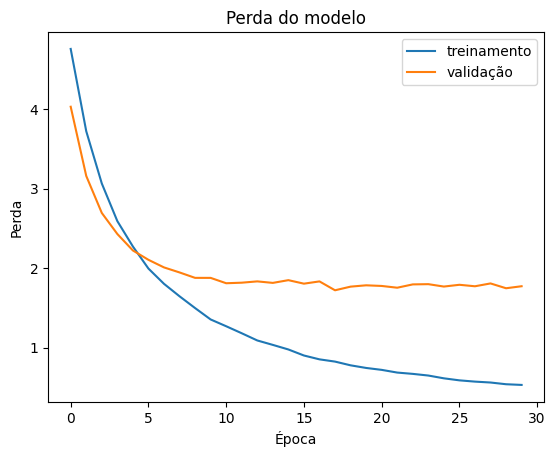

In [17]:

# Plotar gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper right')
plt.show()

In [84]:
#import tensorflow as tf

# Verificar se a GPU está disponível
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
